# Get data for BASE-9

This notebook tests my codes to grab data from Gaia, Pan-STARRS, and 2MASS, then use Gaia data to estimate membership probabilities, and output a phot file for BASE-9

### Gaia:
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

### Pan-STARRS:
- https://gaia.aip.de/metadata/gaiaedr3/panstarrs1_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_panstarrs1_original_valid.html
- https://allendowney.github.io/AstronomicalData/05_join.html

### 2MASS:
- https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries
- https://gaia.aip.de/metadata/gaiaedr3/tmass_psc_xsc_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_crossmatches/ssec_dm_tmass_psc_xsc_join.html
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_tmass_original_valid.html



In [1]:
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from getGaiaData import GaiaClusterMembers

In [3]:
NGC188 = GaiaClusterMembers(12.108, 85.255, 1.)
NGC188.verbose = 1
NGC188.getData()
NGC188.data

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,dr2_radial_velocity,bp_rp,phot_g_mean_mag,parallax,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom
,deg,deg,mas / yr,mas / yr,km / s,mag,mag,mas,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int64,float64,float64,float64,float64,float32,float32,float32,float64,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32
573780383473363584,17.551615302057552,85.4005497609494,0.48361560478935334,2.7392859876776883,--,1.1942196,18.983492,0.18511231016623875,1.0087261,1,0,19.5872001647949,0.0188059993088245,18.963399887085,0.0155339995399117,18.6891994476318,0.0103639997541904,18.5832996368408,0.011680000461638,18.4176998138428,0.0529999993741512,17.164,0.204,16.489,0.262,15.964,0.275
573780387769059200,17.54984437664789,85.39892724061632,-2.1609450344355134,-1.8690525036624548,--,1.7172813,20.627653,0.9984286700919319,0.9779742,1,0,21.4671993255615,0.143189996480942,20.7693996429443,0.0346660017967224,19.9143009185791,0.0136940004304051,19.4983005523682,0.0377690009772778,18.9666996002197,0.0552759990096092,--,--,--,--,--,--
573780422127855104,17.188898293996598,85.38207541380389,-4.228891739354731,4.344376435030026,--,1.0076513,14.814148,1.1150571159333875,1.1777109,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033
573780422127855360,17.193861544007298,85.38168247548535,-3.525026608813936,-6.845611711738799,--,1.0439205,15.009426,1.2523486547329834,1.3208025,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033
573780456487595520,17.335276033295496,85.38062757056113,-6.503324485836155,-1.1750116281554763,--,2.2978954,18.654633,1.088434028205643,1.0011882,1,0,20.2485008239746,0.050051998347044,18.9613990783691,0.0165720004588366,17.9634990692139,0.0047109997831285,17.5251007080078,0.00554900011047721,17.2824001312256,0.00960200000554323,16.005,0.079,15.439,0.124,15.124,0.129
573780456489344384,17.231743332395272,85.38255186898644,0.31634591246981425,3.1798951825515918,--,1.1620712,17.46065,0.5018495584113969,1.0316184,1,0,18.0587005615234,0.00662899995222688,17.431999206543,0.00795399956405163,17.1720008850098,0.00388199998997152,17.0823993682861,0.00741800013929605,16.9736995697021,0.00970099959522486,16.061,0.082,15.52,0.129,15.438,0.17
573780486552572672,17.008316902524513,85.38422798783371,-1.7118121610753572,0.704666569417206,--,0.96244144,16.373852,0.4850692046904234,0.9811877,1,0,16.8577003479004,0.00447899987921119,16.3626003265381,0.00359100010246038,16.1749000549316,0.0051150000654161,16.1189002990723,0.00496099982410669,16.0874996185303,0.0063450001180172,15.18,0.046,14.815,0.051,14.779,0.087
573780486552632832,16.99029381184076,85.39402004477263,3.364376418420352,-0.4987796287077132,--,2.1009293,19.51989,0.49994107308312785,1.0758348,1,0,20.9771995544434,0.0541450008749962,19.8752002716064,0.0361460000276566,18.8257999420166,0.0101920003071427,18.3456001281738,0.0137379998341203,18.0963001251221,0.0156270004808903,16.684,0.155,16.429,0.283,15.773,--


In [4]:
NGC188.data.columns

<TableColumns names=('source_id','ra','dec','pmra','pmdec','dr2_radial_velocity','bp_rp','phot_g_mean_mag','parallax','ruwe','number_of_neighbours','number_of_mates','g_mean_psf_mag','g_mean_psf_mag_error','r_mean_psf_mag','r_mean_psf_mag_error','i_mean_psf_mag','i_mean_psf_mag_error','z_mean_psf_mag','z_mean_psf_mag_error','y_mean_psf_mag','y_mean_psf_mag_error','j_m','j_msigcom','h_m','h_msigcom','ks_m','ks_msigcom')>

(-2.0, 4.0)

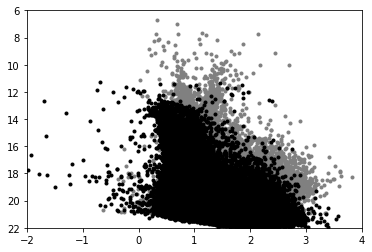

In [5]:
f, ax = plt.subplots()
ax.plot(NGC188.data['bp_rp'], NGC188.data['phot_g_mean_mag'],'.', color='gray')
ax.plot(NGC188.data['g_mean_psf_mag'] - NGC188.data['i_mean_psf_mag'], NGC188.data['g_mean_psf_mag'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [6]:
NGC188.plotNameRoot = 'plots/'
NGC188.verbose = 0

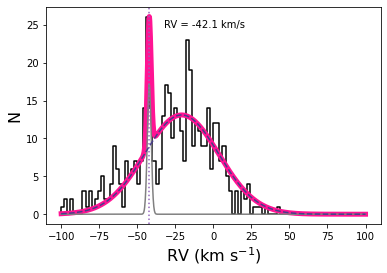

In [7]:
NGC188.getRVMembers()

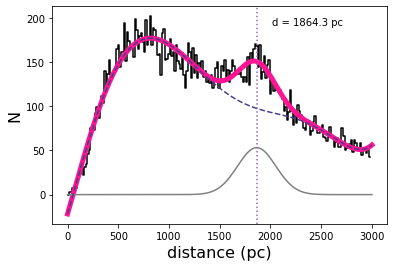

In [8]:
NGC188.distance = 1900 #pc
NGC188.getParallaxMembers()

finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:295: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D(xf, yf).T, cmap=cm.RdPu, bins = 20, \


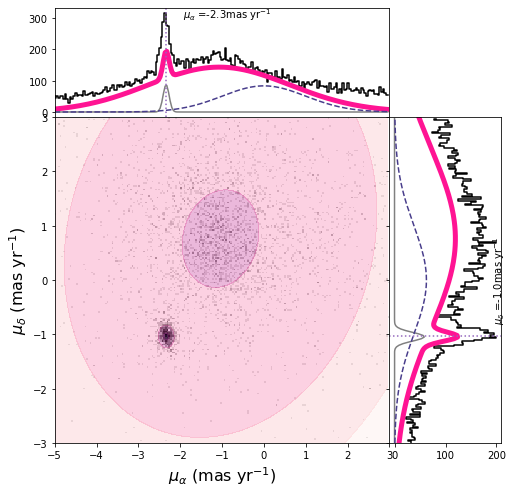

In [9]:
# this is very hard to fit for NGC 188!
NGC188.PMxmin = -5
NGC188.PMxmax = 3
NGC188.PMymin = -3
NGC188.PMymax = 3
NGC188.PMmean = [-2.5, -1]
NGC188.PMxbins = 200
NGC188.PMybins = 200
NGC188.verbose = 1
NGC188.getPMMembers()

In [10]:
NGC188.data

source_id,ra,dec,pmra,pmdec,dr2_radial_velocity,bp_rp,phot_g_mean_mag,parallax,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,PRV,PPa,PPM
,deg,deg,mas / yr,mas / yr,km / s,mag,mag,mas,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float64,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64
573780383473363584,17.551615302057552,85.4005497609494,0.48361560478935334,2.7392859876776883,--,1.1942196,18.983492,0.18511231016623875,1.0087261,1,0,19.5872001647949,0.0188059993088245,18.963399887085,0.0155339995399117,18.6891994476318,0.0103639997541904,18.5832996368408,0.011680000461638,18.4176998138428,0.0529999993741512,17.164,0.204,16.489,0.262,15.964,0.275,--,6.098520405315247e-80,0.0
573780387769059200,17.54984437664789,85.39892724061632,-2.1609450344355134,-1.8690525036624548,--,1.7172813,20.627653,0.9984286700919319,0.9779742,1,0,21.4671993255615,0.143189996480942,20.7693996429443,0.0346660017967224,19.9143009185791,0.0136940004304051,19.4983005523682,0.0377690009772778,18.9666996002197,0.0552759990096092,--,--,--,--,--,--,--,9.234817180446515e-06,7.631380164201845e-23
573780422127855104,17.188898293996598,85.38207541380389,-4.228891739354731,4.344376435030026,--,1.0076513,14.814148,1.1150571159333875,1.1777109,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033,--,6.078718365978604e-07,0.0
573780422127855360,17.193861544007298,85.38168247548535,-3.525026608813936,-6.845611711738799,--,1.0439205,15.009426,1.2523486547329834,1.3208025,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033,--,3.660231569817181e-08,0.0
573780456487595520,17.335276033295496,85.38062757056113,-6.503324485836155,-1.1750116281554763,--,2.2978954,18.654633,1.088434028205643,1.0011882,1,0,20.2485008239746,0.050051998347044,18.9613990783691,0.0165720004588366,17.9634990692139,0.0047109997831285,17.5251007080078,0.00554900011047721,17.2824001312256,0.00960200000554323,16.005,0.079,15.439,0.124,15.124,0.129,--,1.1001561657844878e-06,0.0
573780456489344384,17.231743332395272,85.38255186898644,0.31634591246981425,3.1798951825515918,--,1.1620712,17.46065,0.5018495584113969,1.0316184,1,0,18.0587005615234,0.00662899995222688,17.431999206543,0.00795399956405163,17.1720008850098,0.00388199998997152,17.0823993682861,0.00741800013929605,16.9736995697021,0.00970099959522486,16.061,0.082,15.52,0.129,15.438,0.17,--,0.3113240466203562,0.0
573780486552572672,17.008316902524513,85.38422798783371,-1.7118121610753572,0.704666569417206,--,0.96244144,16.373852,0.4850692046904234,0.9811877,1,0,16.8577003479004,0.00447899987921119,16.3626003265381,0.00359100010246038,16.1749000549316,0.0051150000654161,16.1189002990723,0.00496099982410669,16.0874996185303,0.0063450001180172,15.18,0.046,14.815,0.051,14.779,0.087,--,0.2519822357077598,2.8521200356070017e-122
573780486552632832,16.99029381184076,85.39402004477263,3.364376418420352,-0.4987796287077132,--,2.1009293,19.51989,0.49994107308312785,1.0758348,1,0,20.9771995544434,0.0541450008749962,19.8752002716064,0.0361460000276566,18.8257999420166,0.0101920003071427,18.3456001281738,0.0137379998341203,18.0963001251221,0.0156270004808903,16.684,0.155,16.429,0.283,15.773,--,--,0.30580371862762507,0.0


In [11]:
NGC188.combineMemberships()

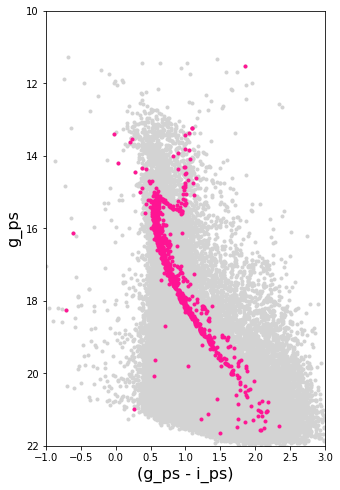

In [12]:
NGC188.membershipMin = 0.01
NGC188.plotCMD()

In [13]:
# output a .phot file for BASE-9
# I may want to rename the .py file.  When finished, upload to Drive

## Testing as pipeline

(Though it will require some tweaking for clusters to define, e.g., distance, PM, etc.)

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]
Finding radial-velocity members ... 
Finding parallax members ... 


finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:295: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D(xf, yf).T, cmap=cm.RdPu, bins = 20, \


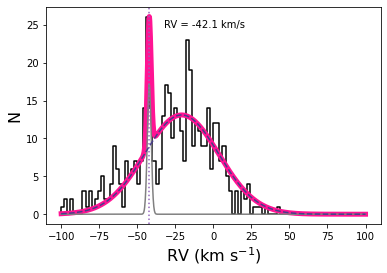

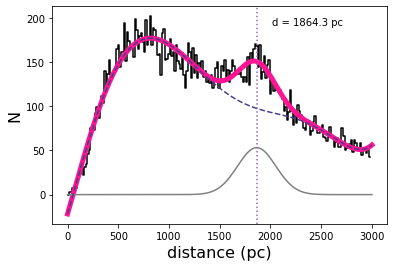

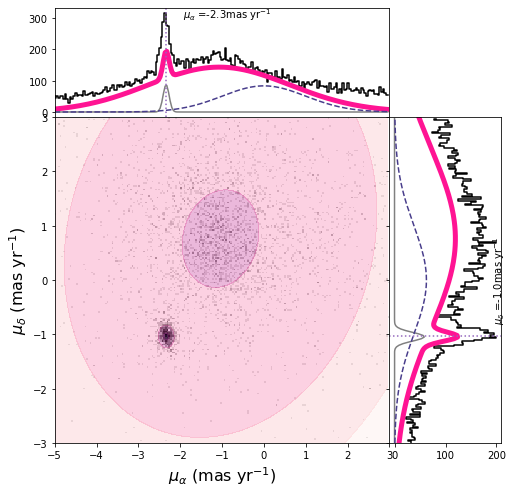

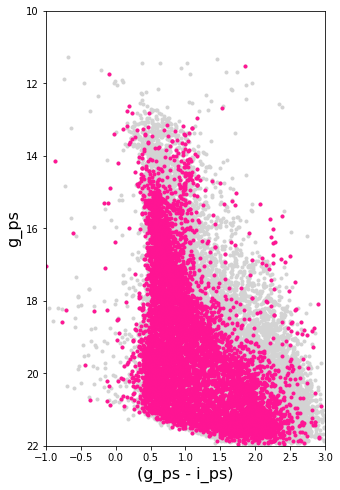

In [14]:
NGC188 = GaiaClusterMembers(12.108, 85.255, 1.)
NGC188.plotNameRoot = 'plots/'
NGC188.distance = 1900 #pc
NGC188.PMxmin = -5
NGC188.PMxmax = 3
NGC188.PMymin = -3
NGC188.PMymax = 3
NGC188.PMmean = [-2.5, -1]
NGC188.PMxbins = 200
NGC188.PMybins = 200
NGC188.verbose = 1
NGC188.runAll()